<a href="https://colab.research.google.com/github/PrathameshGund/AWS-CI/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# adjust base path if you want a different location
BASE="/content/drive/MyDrive/screw_dataset"

!mkdir -p "$BASE/train/Good" "$BASE/train/Defective"
!mkdir -p "$BASE/val/Good"   "$BASE/val/Defective"
!mkdir -p "$BASE/test/Good"  "$BASE/test/Defective"

!ls -R "$BASE" || true

/content/drive/MyDrive/screw_dataset:
test  train  val

/content/drive/MyDrive/screw_dataset/test:
Defective  Good

/content/drive/MyDrive/screw_dataset/test/Defective:

/content/drive/MyDrive/screw_dataset/test/Good:

/content/drive/MyDrive/screw_dataset/train:
Defective  Good

/content/drive/MyDrive/screw_dataset/train/Defective:

/content/drive/MyDrive/screw_dataset/train/Good:

/content/drive/MyDrive/screw_dataset/val:
Defective  Good

/content/drive/MyDrive/screw_dataset/val/Defective:

/content/drive/MyDrive/screw_dataset/val/Good:


# New Section

train/Good: 24 images


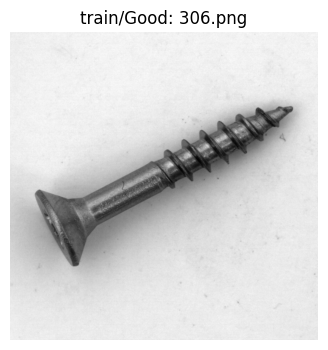

val/Good: 0 images
val/Defective: 0 images
test/Good: 103 images


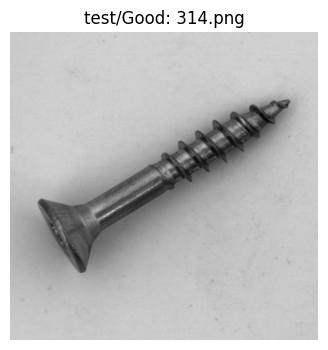

In [ ]:
import os, random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

BASE = "/content/drive/MyDrive/screw_dataset"
for split in ["train","val","test"]:
    for cls in ["Good","Defective"]:
        folder = os.path.join(BASE, split, cls)
        files = [f for f in os.listdir(folder) if f.lower().endswith(('.png','.jpg','.jpeg'))]
        print(f"{split}/{cls}: {len(files)} images")
        if files:
            sample = os.path.join(folder, random.choice(files))
            img = mpimg.imread(sample)
            plt.figure(figsize=(4,4)); plt.imshow(img, cmap='gray'); plt.axis('off')
            plt.title(f"{split}/{cls}: {os.path.basename(sample)}")
            plt.show()
            break

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00


In [ ]:
import os

base = "/content/drive/MyDrive/screw_dataset"
for split in ["train","test"]:
    for cls in ["Good","Defective"]:
        path = os.path.join(base, split, cls)
        print(split, cls, "->", len(os.listdir(path)), "images")


train Good -> 24 images
train Defective -> 16 images
test Good -> 103 images
test Defective -> 7 images


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model for classification
model = YOLO("yolov8n-cls.pt")

# Train
model.train(
    data="/content/drive/MyDrive/screw_dataset",  # dataset root
    epochs=20,        # increase if you have more data
    imgsz=224,        # image size (default for cls is 224)
    batch=16,
    val=False # Disable validation during training
)

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/screw_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model for classification
model = YOLO("yolov8n-cls.pt")

# Train
model.train(
    data="/content/drive/MyDrive/screw_dataset",  # dataset root
    epochs=50,        # increase if you have more data
    imgsz=224,        # image size (default for cls is 224)
    batch=16,
    val=False # Disable validation during training
)

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/screw_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6cda1f1010>
curves: []
curves_results: []
fitness: 0.8695652186870575
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.739130437374115, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8695652186870575}
save_dir: PosixPath('/content/runs/classify/train6')
speed: {'preprocess': 0.060098999997733146, 'inference': 0.40275673912852333, 'loss': 0.0004219130499657932, 'postprocess': 0.0005753478312133508}
task: 'classify'
top1: 0.739130437374115
top5: 1.0

In [ ]:
from ultralytics import YOLO

# Load your best model
model = YOLO("/content/runs/classify/train6/weights/best.pt")  # update path with your run number

# Run test on your dataset
metrics = model.val(data="/content/drive/MyDrive/screw_dataset/test/")

print(metrics)  # will show accuracy


Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /content/drive/MyDrive/screw_dataset/test/train
Found 110 images in subdirectories. Attempting to split...
Splitting /content/drive/MyDrive/screw_dataset/test (4 classes, 110 images) into 80% train, 20% val...
Split complete in /content/drive/MyDrive/screw_dataset/test_split ✅
ERROR ❌ train: /content/drive/MyDrive/screw_dataset/test_split/train... found 87 images in 2 classes (requires 4 classes, not 2)
ERROR ❌ val: /content/drive/MyDrive/screw_dataset/test_split/val... found 23 images in 2 classes (requires 4 classes, not 2)
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3237.7±817.8 MB/s, size: 396.0 KB)
val: Scanning /content/drive/MyDrive/screw_dataset/test_split/val... 23 images, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 1.2Kit/s 0.0s
val: New cache created: /

In [ ]:
from ultralytics import YOLO

# Load classification model
model = YOLO("yolov8n-cls.pt")

# Train only on train/val
model.train(
    data="/content/drive/MyDrive/screw_dataset",  # must contain train/ and val/
    epochs=40,
    imgsz=224
)


Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/screw_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6cda131af0>
curves: []
curves_results: []
fitness: 0.8913043439388275
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.782608687877655, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8913043439388275}
save_dir: PosixPath('/content/runs/classify/train7')
speed: {'preprocess': 0.06148195651526886, 'inference': 0.5532391739072171, 'loss': 0.00045813043391757196, 'postprocess': 0.0012114347832128103}
task: 'classify'
top1: 0.782608687877655
top5: 1.0

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/runs/classify/train7/weights/best.pt")

# Run on test set
results = model.predict(source="/content/drive/MyDrive/screw_dataset/test", save=True)


FileNotFoundError: No images or videos found in /content/drive/MyDrive/screw_dataset/test. Supported formats are:
images: {'tif', 'jpg', 'heic', 'webp', 'tiff', 'bmp', 'pfm', 'dng', 'mpo', 'png', 'jpeg'}
videos: {'gif', 'm4v', 'mov', 'avi', 'ts', 'mpg', 'webm', 'asf', 'mkv', 'mpeg', 'wmv', 'mp4'}

In [ ]:
import os
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Load your trained model
model = YOLO("/content/runs/classify/train7/weights/best.pt")

# Define test path
test_path = "/content/drive/MyDrive/screw_dataset/test"

# Map folder names to labels
class_names = ["Defective", "Good"]  # <-- update if order is different
label_map = {name: i for i, name in enumerate(class_names)}

y_true = []
y_pred = []
misclassified = []

# Loop through folders
for class_name in class_names:
    folder = os.path.join(test_path, class_name)
    for img_file in os.listdir(folder):
        if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(folder, img_file)

            # Run prediction
            results = model.predict(img_path, verbose=False)

            pred_label = int(results[0].probs.top1)  # predicted class index
            true_label = label_map[class_name]

            y_true.append(true_label)
            y_pred.append(pred_label)

            if pred_label != true_label:
                misclassified.append((img_path, class_names[true_label], class_names[pred_label]))

# 📊 Show evaluation
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ❌ Show misclassified images
print("\nMisclassified Images:")
for img_path, true, pred in misclassified:
    print(f"Image: {img_path} | True: {true} | Predicted: {pred}")


Classification Report:
               precision    recall  f1-score   support

   Defective       0.67      0.29      0.40         7
        Good       0.95      0.99      0.97       103

    accuracy                           0.95       110
   macro avg       0.81      0.64      0.69       110
weighted avg       0.94      0.95      0.94       110

Confusion Matrix:
 [[  2   5]
 [  1 102]]

Misclassified Images:
Image: /content/drive/MyDrive/screw_dataset/test/Defective/017.png | True: Defective | Predicted: Good
Image: /content/drive/MyDrive/screw_dataset/test/Defective/020.png | True: Defective | Predicted: Good
Image: /content/drive/MyDrive/screw_dataset/test/Defective/021.png | True: Defective | Predicted: Good
Image: /content/drive/MyDrive/screw_dataset/test/Defective/019.png | True: Defective | Predicted: Good
Image: /content/drive/MyDrive/screw_dataset/test/Defective/018.png | True: Defective | Predicted: Good
Image: /content/drive/MyDrive/screw_dataset/test/Good/319.png | True:

In [ ]:
results = model.predict(source="/content/drive/MyDrive/screw_dataset/test/Defective/thread_side003.png", save=True)


NameError: name 'model' is not defined

# Task
Provide the terminal commands to push the current project to GitHub.

## Verify current directory

### Subtask:
Check the current directory to see if it's the root of the GitHub repository.


**Reasoning**:
I need to check the current directory to see if it's the root of a Git repository by printing the current directory and listing all files including hidden ones to check for a `.git` directory.



In [1]:
!pwd
!ls -a

/content
.  ..  .config	sample_data


## Add changes

### Subtask:
Stage the changes to be committed.


**Reasoning**:
Change the directory to the GitHub repository path.



In [2]:
%cd /content/drive/MyDrive/screw_dataset

[Errno 2] No such file or directory: '/content/drive/MyDrive/screw_dataset'
/content


**Reasoning**:
The previous command failed because the directory was not found. I will try to list the contents of '/content/drive/MyDrive/' to check if the 'screw_dataset' directory exists.



In [ ]:
!ls /content/drive/MyDrive/